In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_validate # 교차 검증 클래스
from sklearn.tree import DecisionTreeRegressor # 결정트리
import itertools
from sklearn.tree import plot_tree

# for dataloading
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')

# 오류 데이터 삭제
error_data = ['C2085', 'C1397', 'C2431', 'C1649', 'C1095', 'C2051', 'C1218', 'C1894', 'C2483', 'C1502', 'C1988']
for error in error_data:
    error_index = train[train['단지코드'] == error].index
    train.drop(error_index, inplace=True)

# for 중복값 제거
train = train.drop_duplicates()
test = test.drop_duplicates()

# for 아파트이면서 공공분양이 아닌 데이터만 사용
train = train[(train.임대건물구분 == '아파트') & (train.공급유형 != '공공분양')]
test = test[(test.임대건물구분 == '아파트') & (test.공급유형 != '공공분양')]

# 임대보증금과 임대료 타입 float로 변환
train.loc[train.임대보증금=='-', '임대보증금'] = np.nan
test.loc[test.임대보증금=='-','임대보증금' ] = np.nan
train['임대보증금'] = train['임대보증금'].astype(float)
test['임대보증금'] = test['임대보증금'].astype(float)
train.loc[train.임대료=='-', '임대료'] = np.nan
test.loc[test.임대료=='-', '임대료'] = np.nan
train['임대료'] = train['임대료'].astype(float)
test['임대료'] = test['임대료'].astype(float)

# 공급유형이 장기전세면 임대료 = 0
train.loc[(train.공급유형=='장기전세')&(train.임대료.isnull()), '임대료']=0

# 지하철역과 버스 정류장의 NULL값의 경우, 0으로 판단, 밑에서 컬럼명 바꿈(지하철, 버스)
train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0, inplace=True)
train['도보 10분거리 내 버스정류장 수'].fillna(0, inplace=True)

test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0, inplace=True)
test['도보 10분거리 내 버스정류장 수'].fillna(0, inplace=True)

# test의 자격유형에 있는 2개 결측치 채우기
test.loc[(test.단지코드=='C2411')&(test.자격유형.isnull()), '자격유형'] = 'A'
test.loc[(test.단지코드=='C2253')&(test.자격유형.isnull()), '자격유형'] = 'C'

# train 강원도 행복주택

# 전용면적 16.91 
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 16.91), '임대보증금'] = 13450000
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 16.91), '임대료'] = 65500
# 전용면적 26.9
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 26.9), '임대보증금'] = 19700000
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 26.9), '임대료'] = 96000
# 전용면적 26.9
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 26.9), '임대보증금'] = 19150000
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 26.9), '임대료'] = 94000
# 전용면적 26.9
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 26.9), '임대보증금'] = 21400000
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 26.9), '임대료'] = 105000

# train 부산 국민임대

# 전용면적 24.72
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 24.72), '임대보증금'] = 7000000
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 24.72), '임대료'] = 135000
# 전용면적 24.79
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 24.79), '임대보증금'] = 7000000
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 24.79), '임대료'] = 135000
# 전용면적 26.83
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 26.83), '임대보증금'] = 7600000
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 26.83), '임대료'] = 142000
# 전용면적 37.7
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 37.7), '임대보증금'] = 14800000
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 37.7), '임대료'] = 198000
# 전용면적 46.94
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 46.94), '임대보증금'] = 23100000
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 46.94), '임대료'] = 259000

# train 대구 국민임대

# 전용면적 29.17
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 29.17), '임대보증금'] = 10847000
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 29.17), '임대료'] = 138600
# 전용면적 29.34
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 29.34), '임대보증금'] = 10847000
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 29.34), '임대료'] = 138600
# 전용면적 37.43
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 37.43), '임대보증금'] = 17338000
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 37.43), '임대료'] = 197500

# test 대전 임대상가

# 전용면적 26.37
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 26.37), '임대보증금'] = 5787000
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 26.37), '임대료'] = 79980
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 26.37), '자격유형'] = 'C'
# 전용면적 52.74
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 52.74), '임대보증금'] = 11574000
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 52.74), '임대료'] = 159960
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 52.74), '자격유형'] = 'C'

# test 강원도 영구임대

# 전용면적 24.83
test.loc[(test['단지코드'] == 'C2152') & (test['전용면적'] == 24.83), '임대보증금'] = 2129000
test.loc[(test['단지코드'] == 'C2152') & (test['전용면적'] == 24.83), '임대료'] = 42350
# 전용면적 33.84
test.loc[(test['단지코드'] == 'C2152') & (test['전용면적'] == 33.84), '임대보증금'] = 2902000
test.loc[(test['단지코드'] == 'C2152') & (test['전용면적'] == 33.84), '임대료'] = 57730

# test 경상남도 행복주택

# 전용면적 16.94
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 16.94), '임대보증금'] = 11200000
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 16.94), '임대료'] = 53200
# 전용면적 26.85
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 26.85), '임대보증금'] = 16333330
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 26.85), '임대료'] = 77580
# 전용면적 26.85
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 26.85), '임대보증금'] = 18620000
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 26.85), '임대료'] = 88440
# 전용면적 36.77
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 36.77), '임대보증금'] = 23760000
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 36.77), '임대료'] = 112860

# 데이터프레임 컬럼명 변경(버스,지하철 컬럼명이 너무 길어서 변경)
train.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형',
    '전용면적', '전용면적별세대수', '공가수', '자격유형', '임대보증금',
    '임대료', '지하철', '버스', '단지내주차면수', '등록차량수']
test.columns = [
    '단지코드', '총세대수', '임대건물구분', '지역', '공급유형',
    '전용면적', '전용면적별세대수', '공가수', '자격유형', '임대보증금',
    '임대료', '지하철', '버스', '단지내주차면수']

# 지역별 예측값을 보기위한 코드
df = test.loc[:, ['지역', '단지코드', '단지내주차면수']]

# train 공급유형
train.loc[train['공급유형'].isin(['국민임대']),'공급유형그룹'] = '국민임대'
train.loc[train['공급유형'].isin(['공공임대(50년)']),'공급유형그룹'] = '장기공공임대'
train.loc[train['공급유형'].isin(['공공임대(5년)', '공공임대(10년)', '공공임대(분납)']),'공급유형그룹'] = '단기공공임대'
train.loc[train['공급유형'].isin(['행복주택', '영구임대', '장기전세']), '공급유형그룹'] = '저소득층'

# test 공급유형
test.loc[test['공급유형'].isin(['국민임대']),'공급유형그룹'] = '국민임대'
test.loc[test['공급유형'].isin(['공공임대(50년)']),'공급유형그룹'] = '장기공공임대'
test.loc[test['공급유형'].isin(['공공임대(5년)', '공공임대(10년)', '공공임대(분납)']),'공급유형그룹'] = '단기공공임대'
test.loc[test['공급유형'].isin(['행복주택', '영구임대', '장기전세']), '공급유형그룹'] = '저소득층'

train = train.drop(labels='공급유형', axis=1)
test = test.drop(labels='공급유형', axis=1)

# train 지역
train.insert(4, 'n지역','')
train.loc[(train['지역'] == '강원도') | (train['지역'] == '제주특별자치도') | (train['지역'] == '충청남도') | (train['지역'] == '울산광역시'), 'n지역'] = 0
train.loc[(train['지역'] == '전라남도') | (train['지역'] == '전라북도') | (train['지역'] == '경상남도'), 'n지역'] = 1
train.loc[(train['지역'] == '부산광역시') | (train['지역'] == '충청북도') | (train['지역'] == '경상북도'), 'n지역'] = 2
train.loc[(train['지역'] == '대전광역시') | (train['지역'] == '광주광역시') | (train['지역'] == '서울특별시'), 'n지역'] = 3
train.loc[(train['지역'] == '경기도') | (train['지역'] == '대구광역시') | (train['지역'] == '세종특별자치시'), 'n지역'] = 4

# test 지역
test.insert(4, 'n지역','')
test.loc[(test['지역'] == '강원도') | (test['지역'] == '제주특별자치도') | (test['지역'] == '충청남도') | (test['지역'] == '울산광역시'), 'n지역'] = 0
test.loc[(test['지역'] == '전라남도') | (test['지역'] == '전라북도') | (test['지역'] == '경상남도'), 'n지역'] = 1
test.loc[(test['지역'] == '부산광역시') | (test['지역'] == '충청북도') | (test['지역'] == '경상북도'), 'n지역'] = 2
test.loc[(test['지역'] == '대전광역시') | (test['지역'] == '광주광역시') | (test['지역'] == '서울특별시'), 'n지역'] = 3
test.loc[(test['지역'] == '경기도') | (test['지역'] == '대구광역시') | (test['지역'] == '세종특별자치시'), 'n지역'] = 4


train = train.drop(labels='지역', axis=1)
test = test.drop(labels='지역', axis=1)

# train 자격유형
train.loc[train['자격유형'].isin(['E','H','I','J']),'자격유형그룹'] = 'q1'
train.loc[train['자격유형'].isin(['B','L']),'자격유형그룹'] = 'q2'
train.loc[train['자격유형'].isin(['G','K','M','N','O']),'자격유형그룹'] = 'q3'
train.loc[train['자격유형'].isin(['D','C','F']),'자격유형그룹'] = 'q4'
train.loc[train['자격유형'].isin(['A']),'자격유형그룹'] = 'q5'

# test 자격유형
test.loc[test['자격유형'].isin(['E','H','I','J']),'자격유형그룹'] = 'q1'
test.loc[test['자격유형'].isin(['B','L']),'자격유형그룹'] = 'q2'
test.loc[test['자격유형'].isin(['G','K','M','N','O']),'자격유형그룹'] = 'q3'
test.loc[test['자격유형'].isin(['D','C','F']),'자격유형그룹'] = 'q4'
test.loc[test['자격유형'].isin(['A']),'자격유형그룹'] = 'q5'

train = train.drop(labels='자격유형', axis=1)
test = test.drop(labels='자격유형', axis=1)

# 데이터프레임 인덱스 재정의
train.reset_index(drop=False, inplace=True)
test.reset_index(drop=False, inplace=True)

# 원-핫 인코딩
train = pd.get_dummies(train, columns = ['n지역','공급유형그룹','자격유형그룹'])
test =  pd.get_dummies(test, columns = ['n지역','공급유형그룹','자격유형그룹'])

# train데이터 컬럼 정리
train = train[['총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', '지하철', '버스',
       '단지내주차면수', 'n지역_0', 'n지역_1', 'n지역_2', 'n지역_3', 'n지역_4',
       '공급유형그룹_국민임대', '공급유형그룹_단기공공임대', '공급유형그룹_장기공공임대', '공급유형그룹_저소득층',
       '자격유형그룹_q1', '자격유형그룹_q2', '자격유형그룹_q3', '자격유형그룹_q4', '자격유형그룹_q5', '등록차량수']]
test = test[['총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', '지하철', '버스',
       '단지내주차면수', 'n지역_0', 'n지역_1', 'n지역_2', 'n지역_3', 'n지역_4', '공급유형그룹_국민임대',
       '공급유형그룹_단기공공임대', '공급유형그룹_장기공공임대', '공급유형그룹_저소득층', '자격유형그룹_q1',
       '자격유형그룹_q2', '자격유형그룹_q3', '자격유형그룹_q4', '자격유형그룹_q5']]

############################################################
#######################전처리 완료##########################
############################################################

# train데이터에서  data, target 지정 
from sklearn.model_selection import train_test_split 

data = train.drop(columns=['등록차량수'])
target = train['등록차량수']

# train세트와 test세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [ ]:
# 층 쌓기 - 계속 변형해 가면서 잘 예측하는 걸로 선택하면됨
X = tf.keras.layers.Input(shape=[23])

H = tf.keras.layers.Dense(128)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.relu)(H)
H = tf.keras.layers.Dropout(0.4)(H)

H = tf.keras.layers.Dense(256)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.relu)(H)
H = tf.keras.layers.Dropout(0.4)(H)

Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X, Y)
sgd = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(loss='mae', optimizer=sgd) # loss='mse'는 회귀, mae < 이게 더 잘 돌아감

history = model.fit(train_input, train_target, epochs=40, batch_size=128, validation_split=0.2) # 모델 훈련

Epoch 1/40
12/12 [==============================] - 2s 38ms/step - loss: 642.8053 - val_loss: 639.5398
Epoch 2/40
12/12 [==============================] - 0s 17ms/step - loss: 640.7239 - val_loss: 637.3209
Epoch 3/40
12/12 [==============================] - 0s 15ms/step - loss: 637.8930 - val_loss: 636.2043
Epoch 4/40
12/12 [==============================] - 0s 12ms/step - loss: 634.6545 - val_loss: 634.7188
Epoch 5/40
12/12 [==============================] - 0s 13ms/step - loss: 631.3815 - val_loss: 625.0780
Epoch 6/40
12/12 [==============================] - 0s 15ms/step - loss: 627.2984 - val_loss: 627.5249
Epoch 7/40
12/12 [==============================] - 0s 14ms/step - loss: 623.1175 - val_loss: 628.0461
Epoch 8/40
12/12 [==============================] - 0s 17ms/step - loss: 618.3820 - val_loss: 627.2004
Epoch 9/40
12/12 [==============================] - 0s 13ms/step - loss: 612.4427 - val_loss: 625.1148
Epoch 10/40
12/12 [==============================] - 0s 11ms/step - loss:

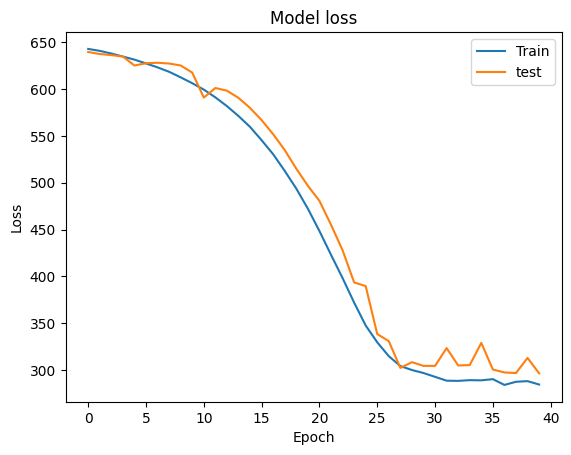

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'test'], loc='upper right')
plt.show()

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 23)]              0         
                                                                 
 dense_3 (Dense)             (None, 128)               3072      
                                                                 
 batch_normalization_2 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                           

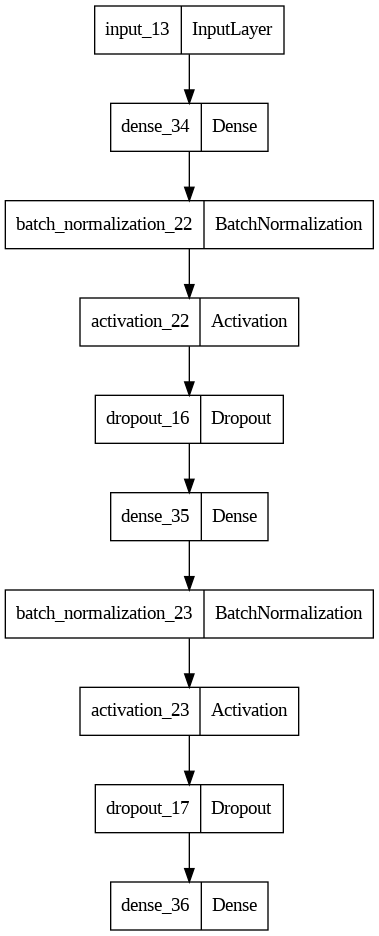

In [ ]:
keras.utils.plot_model(model) 

In [ ]:
# 예측 확인하는 용도의 코드 >> 뭔가 이상함 다시 확인해 봐야될듯
print(model.predict(test_input[:10]))
print(test_target[:10])

1/1 [==============================] - 0s 25ms/step
[[333.04565]
 [433.70538]
 [332.54065]
 [492.2389 ]
 [400.5019 ]
 [674.5039 ]
 [340.9997 ]
 [336.34692]
 [337.01672]
 [583.40857]]
1755     922.0
1281    1350.0
350      579.0
420      422.0
56       301.0
1556     957.0
845     1145.0
1657     982.0
111       98.0
2074      78.0
Name: 등록차량수, dtype: float64


In [ ]:
train_input

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,지하철,버스,단지내주차면수,n지역_0,...,n지역_4,공급유형그룹_국민임대,공급유형그룹_단기공공임대,공급유형그룹_장기공공임대,공급유형그룹_저소득층,자격유형그룹_q1,자격유형그룹_q2,자격유형그룹_q3,자격유형그룹_q4,자격유형그룹_q5
316,1473,46.96,176,13.0,39668000.0,311110.0,0.0,3.0,1299.0,0,...,1,1,0,0,0,0,0,0,0,1
2161,581,36.86,148,21.0,33640000.0,162000.0,0.0,3.0,408.0,0,...,0,0,0,0,1,1,0,0,0,0
1894,295,43.07,4,28.0,23908000.0,131000.0,0.0,1.0,167.0,0,...,0,0,0,0,1,0,1,0,0,0
427,586,36.63,90,2.0,8738000.0,74890.0,0.0,2.0,472.0,0,...,0,1,0,0,0,0,0,0,0,1
374,998,39.90,121,29.0,16737000.0,110790.0,0.0,2.0,1240.0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,552,36.83,160,21.0,9247000.0,180350.0,0.0,3.0,523.0,0,...,0,1,0,0,0,0,0,0,0,1
1095,594,39.48,180,16.0,17004000.0,115520.0,1.0,6.0,596.0,0,...,1,1,0,0,0,0,0,0,0,1
1130,631,46.22,39,8.0,16341000.0,108080.0,0.0,3.0,442.0,0,...,0,1,0,0,0,0,0,0,0,1
1294,462,36.74,28,13.0,11542000.0,87710.0,0.0,6.0,387.0,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
train_target

316     799.0
2161    444.0
1894    164.0
427     596.0
374     995.0
        ...  
1638    410.0
1095    570.0
1130    528.0
1294    284.0
860     321.0
Name: 등록차량수, Length: 1811, dtype: float64

In [ ]:
# test파일 모든 예측 값 확인(837개)
print(model.predict(test))

27/27 [==============================] - 0s 2ms/step
[[598.6491 ]
 [739.5876 ]
 [739.5877 ]
 [739.5877 ]
 [787.67096]
 [787.67096]
 [787.67096]
 [787.67096]
 [598.6497 ]
 [598.64954]
 [598.64954]
 [739.58795]
 [739.58795]
 [739.58795]
 [787.671  ]
 [787.671  ]
 [787.671  ]
 [559.6259 ]
 [637.2708 ]
 [637.2708 ]
 [637.2708 ]
 [739.52545]
 [739.52545]
 [786.33075]
 [829.34406]
 [487.77606]
 [487.77585]
 [583.3614 ]
 [624.895  ]
 [659.4712 ]
 [659.4711 ]
 [783.7757 ]
 [783.7757 ]
 [783.7757 ]
 [783.7757 ]
 [819.16095]
 [819.16095]
 [675.1629 ]
 [675.1628 ]
 [691.2225 ]
 [793.85895]
 [793.85895]
 [793.8589 ]
 [793.85895]
 [793.85895]
 [824.6381 ]
 [817.5152 ]
 [817.5152 ]
 [386.90414]
 [531.74225]
 [531.74194]
 [601.60675]
 [601.60675]
 [712.451  ]
 [508.53516]
 [820.1668 ]
 [820.1668 ]
 [688.39136]
 [334.38278]
 [368.46042]
 [525.0649 ]
 [838.313  ]
 [808.2256 ]
 [324.2974 ]
 [324.29733]
 [496.7986 ]
 [560.8931 ]
 [344.63696]
 [379.31387]
 [473.42886]
 [473.4289 ]
 [548.1799 ]
 [258.91568

In [ ]:
# 예측값 저장
pred = model.predict(test).reshape(-1,)
code_n = np.array(code).reshape(-1,)
df = pd.DataFrame({'code':code_n, 'pred':pred})
df_mean = df.groupby('code')['pred'].agg(**{'mean':'mean'}).reset_index()

27/27 [==============================] - 0s 2ms/step


In [ ]:
# 최종 단지별 예측값
df_mean

,code,mean
0,C1003,478.445587
1,C1006,338.780701
2,C1016,500.798035
3,C1019,370.319305
4,C1030,587.534424
...,...,...
145,C2653,498.896484
146,C2675,556.692749
147,C2676,338.774689
148,C2688,346.637512


In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 KB 4.0 MB/s eta 0:00:00


In [ ]:
def build_model(hp):
  hp_units1 = hp.Int('units_1', min_value = 16, max_value = 234, step=2)
  hp_units2 = hp.Int('units_2', min_value = 16, max_value = 234, setp=2)
  hp_units4 = hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)
  hp_units5 = hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)

  model = keras.Sequential()
  model.add(layers.Dense(hp_units1, activation='relu', inpupt_shape=[23]))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(hp_units4))

  model.add(layers.Dense(hp_units2, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(hp_units5))

  model.add(layers.Dence(1))

  # Tune the learning rate for the optimizer 
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  sgd = tf.keras.optimizers.SGD(
        learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]),
        momentum=hp.Choice('momentum', values=[.9, .7, .5, .3]))
  
  model.compile(optimizer = sgd,
                loss = 'mae')
  return model

In [ ]:
from tensorflow import keras
from keras_tuner.tuners import RandomSearch

tuner = RandomSearch(build_model,
                     objective='loss', max_trials=150, 
                     executions_per_trial=3, directory='my_dir', 
                     project_name='hello', overwrite=True)

tuner.search(train_input,train_target, epochs=100, verbose=0)

tuner.results_summary()

Results summary
Results in my_dir/hello
Showing 10 best trials
Objective(name="loss", direction="min")

Trial 023 summary
Hyperparameters:
units: 16
learning_rate: 0.01
momentum: 0.9
Score: 337.46815999348956

Trial 056 summary
Hyperparameters:
units: 14
learning_rate: 0.01
momentum: 0.9
Score: 337.468505859375

Trial 087 summary
Hyperparameters:
units: 26
learning_rate: 0.01
momentum: 0.9
Score: 337.4797770182292

Trial 042 summary
Hyperparameters:
units: 18
learning_rate: 0.01
momentum: 0.9
Score: 337.4869689941406

Trial 009 summary
Hyperparameters:
units: 28
learning_rate: 0.01
momentum: 0.9
Score: 337.4980163574219

Trial 012 summary
Hyperparameters:
units: 20
learning_rate: 0.01
momentum: 0.9
Score: 337.4989013671875

Trial 055 summary
Hyperparameters:
units: 12
learning_rate: 0.01
momentum: 0.9
Score: 337.507080078125

Trial 077 summary
Hyperparameters:
units: 22
learning_rate: 0.01
momentum: 0.9
Score: 337.50794474283856

Trial 089 summary
Hyperparameters:
units: 10
learning_ra